<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-leo0nel09/blob/main/SEP30-31/30_sep_Monte_Carlos_MCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.- Define an initial value of the free parameters.
2.- Draw a new random sample of the free parameters from a gaussian distribution centered at the initial values, and with
a predefined dispersion.
3.- Evaluate the (logarithm) posterior of the initial parameters and that of the proposed parameters and compare them.
- El algoritmo Monte Carlo Markov Chain Metropolis es un método de inferencia bayesiana que se utiliza para aproximar la distribución posterior de un modelo. El algoritmo se puede implementar en Python y se utiliza para muestrear de la distribución posterior. El algoritmo funciona de la siguiente manera:

- Se establece un valor inicial para los parámetros del modelo.
- Se propone un nuevo conjunto de valores para los parámetros del modelo utilizando una distribución gaussiana.
- Se evalúa la función de verosimilitud y la función de prior para los valores iniciales y propuestos.
- Si la función de verosimilitud y la función de prior son mayores para los valores propuestos, se aceptan los nuevos valores como el nuevo conjunto de valores iniciales.
- Si la función de verosimilitud y la función de prior son menores para los valores propuestos, se calcula una probabilidad de aceptación y se compara con un número aleatorio uniforme entre 0 y 1.
- Si la probabilidad de aceptación es mayor que el número aleatorio, se aceptan los nuevos valores como el nuevo conjunto de valores iniciales.
- Si la probabilidad de aceptación es menor que el número aleatorio, se rechazan los nuevos valores y se mantiene el conjunto anterior como el nuevo conjunto de valores iniciales.
- El modelo utilizado en este ejemplo es f = w_0 + w_1 * x, donde w_0 y w_1 son los parámetros del modelo y x es la variable independiente. La función de verosimilitud utilizada es sum_i (y_i - f(x_i,w))^2 - 2 * sigma_i^2, donde y_i son las observaciones y sigma_i es el error estándar asociado con cada observación. La función posterior utilizada es Ln Posterior = Ln Verosimilitud + Ln Prior.

En este ejemplo, se utiliza una distribución plana como prior, lo que significa que si theta está dentro del rango [theta_min, theta_max], Prior(theta) = 1; en caso contrario, Prior(theta) = 0.

Los datos proporcionados son una serie temporal que muestra los tiempos ganadores en las carreras olímpicas masculinas de 100 metros desde 1896 hasta 2008.

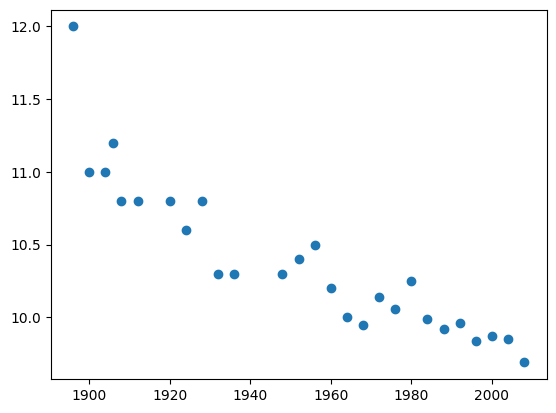

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("/content/olympic100m_men.txt",delimiter = ",").T
x=data[0]
y=data[1]
plt.scatter(x,y)


In [10]:
#Definir el modelo
def modelo(w_0,w_1,modelo):
  return w_0 + w_1 * x

#Likelihood
def likelihood(theta):
  w_0, w_1 = theta
  sigma = 1e-3
  error = y - modelo(w_0,w_1,x)
  return -0.5 * np.sum(error ** 2/(2 * sigma_i**2))

#Prior
def prior(theta):




SyntaxError: ignored

1-Define an initial valur of the free parameter
2- Draw a new random sample of the free parameter from a gaussian distributio centeres at the initial values, and with a predefined dispersion
3- Evaluate the (logarithm) posterior of the initial parameters and that of the proposed parameters and compare them.
- if the (logarithm) posterior of the proposal is higher than the (logarithm) posterior of the initial parameters accept
the proposal and save it.
- if the (logarithm) posterior of the proposal is lower than the (logarithm) posterior of the initial parameters then
generate a random number between cero and one, if the ratio of the (logarithm) posterior of the proposal and the
initial parameter is larger than such number then you accept the proposal and save it, if not you discard the
proposal and keep the initial value.
If the proposal was accepted, replace the initial value by such proposal, if not keep the initial sample and repeat step
After many steps, look at the resultant distribution (the chains) of parameters, i.e., the likelihood/posterior

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de las carreras olímpicas de 100 metros
data = np.loadtxt("/content/olympic100m_men.txt",delimiter = ",").T
x=data[0]
y=data[1]



# Función del modelo
def model(w_0, w_1, x):
    return w_0 + w_1 * x

# Función de verosimilitud
def likelihood(theta):
    w_0, w_1 = theta
    sigma_i = 0.01
    error = y - model(w_0, w_1, x)
    return np.sum(error ** 2 / (2 * sigma_i ** 2))

# Función de prior
def prior(theta):
    theta_min = [-1, -1]  # Define los límites para los parámetros
    theta_max = [1, 1]
    if all(theta_min <= theta) and all(theta <= theta_max):
        return 0  # Prior plano dentro del rango
    else:
        return -np.inf  # Prior 0 fuera del rango

# Función de posterior
def posterior(theta):
    return likelihood(theta) + prior(theta)

# Número de muestras a generar
n_samples = 10000

theta_ini = np.array([0, 0])    #parametros iniciales para la variable thera_ini
sigma = 0.01



In [41]:
# Almacenar
samples = []  #Esta variable sera para almacenar los samples

# Algoritmo MCMC Metropolis
for _ in range(n_samples):
    theta_prop = theta_ini + np.random.normal(scale=sigma, size=2)  #generar valores random entre los valores de sigma

    ln_posterior_ratio = posterior(theta_prop) - posterior(theta_ini)

    if np.log(np.random.rand()) < ln_posterior_ratio:
        theta_ini = theta_prop
    samples.append(theta_ini)

samples = np.array(samples)
samples




array([[ 0.        ,  0.        ],
       [ 0.00465493, -0.00759934],
       [ 0.00465493, -0.00759934],
       ...,
       [ 0.12433795, -0.99998824],
       [ 0.12433795, -0.99998824],
       [ 0.12433795, -0.99998824]])

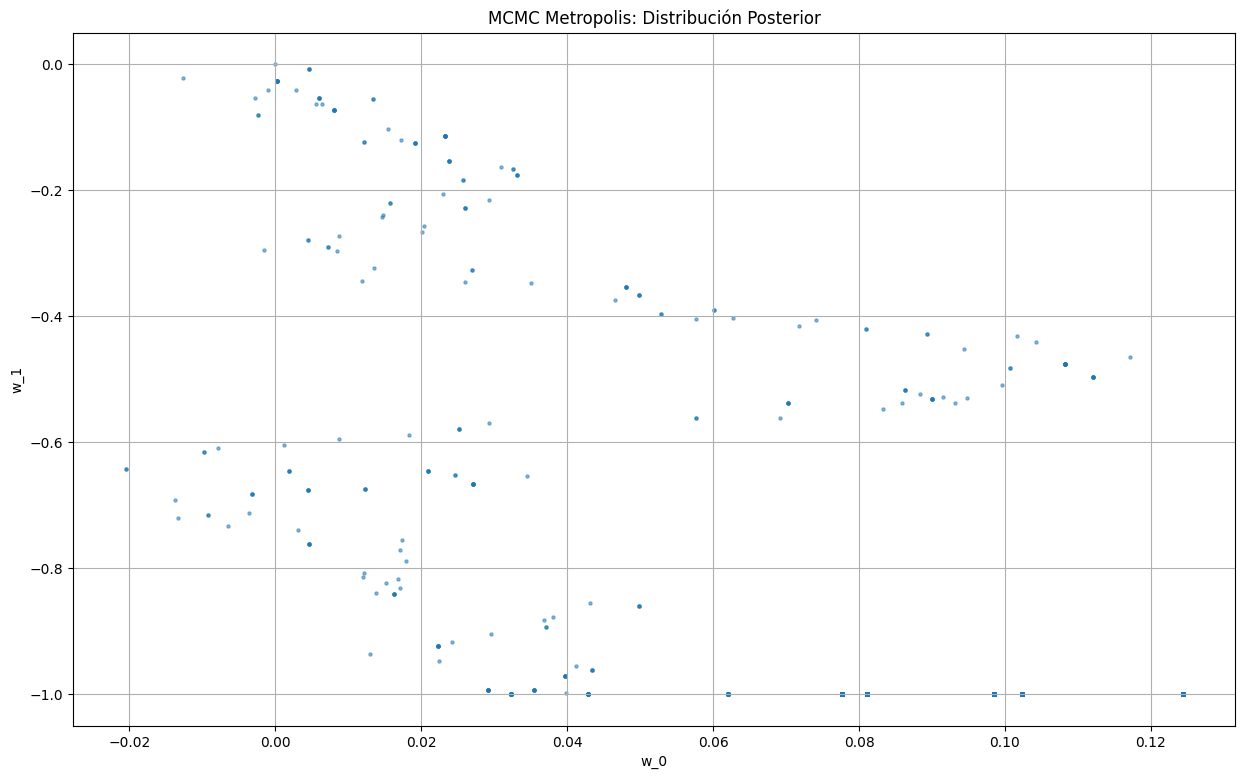

In [42]:
# Visualización de los resultados
plt.figure(figsize=(15, 9))
plt.scatter(samples[:, 0], samples[:, 1], s=5, alpha=0.5)
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.title('MCMC Metropolis: Distribución Posterior')
plt.grid(True)
plt.show()